# Cuaderno para obtener información previa a la obtención de ventanas y al clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
activity_load = pd.read_csv('../../datasets/first-study/activity_load.csv')
activity_load.head()

,seconds,date,activity_load_2d,activity_load_3d
0,1.802,2023-04-23 18:10:39.569,0.0683,0.0928
1,2.802,2023-04-23 18:10:40.569,0.0850,0.1123
2,3.802,2023-04-23 18:10:41.569,0.0588,0.0710
3,4.802,2023-04-23 18:10:42.569,0.0267,0.0356
4,5.802,2023-04-23 18:10:43.569,0.0489,0.0677


<AxesSubplot:>

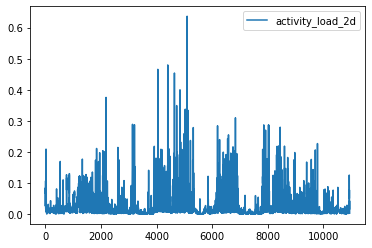

In [3]:
activity_load.plot(y='activity_load_2d')

<AxesSubplot:>

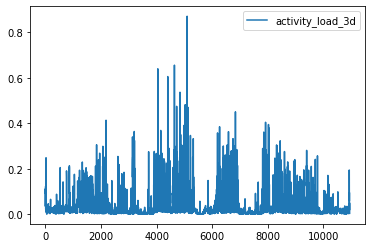

In [4]:
activity_load.plot(y='activity_load_3d')

In [5]:
min_seconds = activity_load['seconds'].min()
max_seconds = activity_load['seconds'].max()

print(f"Valor mínimo {min_seconds}")
print(f"Valor máximo {max_seconds}")

Valor mínimo 1.802
Valor máximo 10971.689


In [6]:
minutes = (max_seconds - min_seconds) / 60
hours = minutes / 60
print(f"Minutos totales: {minutes} minutos")
print(f"Horas totales: {hours} horas")

Minutos totales: 182.83145000000002 minutos
Horas totales: 3.0471908333333335 horas


In [7]:
activity_load['seconds'].diff()

0        NaN
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10937    1.0
10938    1.0
10939    1.0
10940    1.0
10941    1.0
Name: seconds, Length: 10942, dtype: float64

In [8]:
activity_load['seconds'].diff().unique()

array([  nan, 1.   , 1.   , 1.16 , 1.161, 1.   , 1.162, 1.   , 1.163,
       1.16 , 1.162, 1.161, 1.161, 1.163, 1.161, 1.162, 1.   , 1.162,
       1.16 , 1.161, 1.162, 1.161, 1.163, 1.16 , 1.163, 1.162])

La diferencia entre registros está en torno al segundo, no hay un gran tramo de tiempo sin recoger información. Por tanto, no se rellenan los gaps

In [9]:
activity_load['diff'] = activity_load['seconds'].diff()

In [10]:
activity_load.pivot_table(columns=['diff'], aggfunc='size')

diff
1.000        1
1.000        1
1.000    10758
1.000        1
1.000        1
1.160       10
1.160        1
1.160        1
1.160        2
1.161        3
1.161        2
1.161        3
1.161        3
1.161        4
1.161       76
1.162        3
1.162        8
1.162        9
1.162        1
1.162        5
1.162       40
1.163        2
1.163        1
1.163        2
1.163        3
dtype: int64

In [11]:
len(activity_load)

10942

Frecuencia de un segundo, rellenar los gaps, la diferencia es de un segundo, como mucho un segundo con casi dos décimas.

In [12]:
activity_load.describe()

,seconds,activity_load_2d,activity_load_3d,diff
count,10942.000000,10942.000000,10942.000000,10941.000000
mean,5486.694905,0.023958,0.035805,1.002640
std,3167.185111,0.035977,0.054928,0.020473
min,1.802000,0.001600,0.002100,1.000000
25%,2744.151000,0.005500,0.007200,1.000000
50%,5486.664000,0.010600,0.014700,1.000000
75%,8229.177000,0.023300,0.032200,1.000000
max,10971.689000,0.636300,0.871300,1.163000


In [13]:
activity_load.dtypes

seconds             float64
date                 object
activity_load_2d    float64
activity_load_3d    float64
diff                float64
dtype: object

In [14]:
activity_load['activity_load_3d'].notnull().all()

True

<AxesSubplot:>

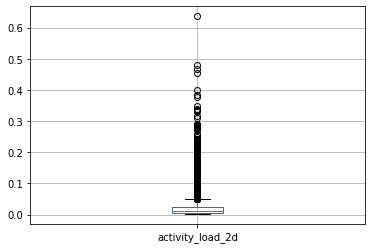

In [17]:
activity_load.boxplot('activity_load_2d')

<AxesSubplot:>

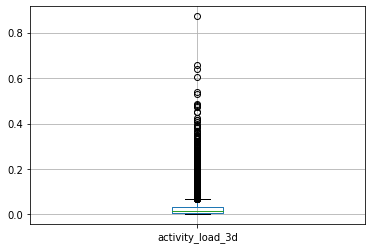

In [18]:
activity_load.boxplot('activity_load_3d')

array([[<AxesSubplot:title={'center':'activity_load_2d'}>]], dtype=object)

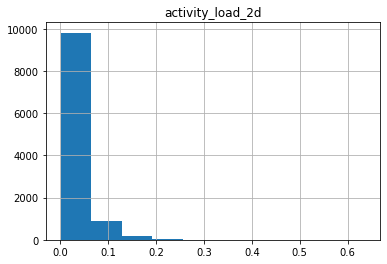

In [20]:
activity_load.hist('activity_load_2d')

array([[<AxesSubplot:title={'center':'activity_load_3d'}>]], dtype=object)

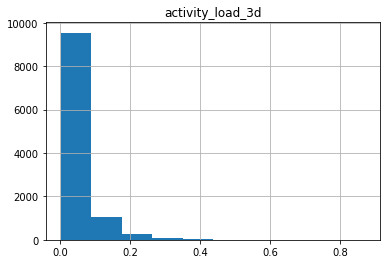

In [21]:
activity_load.hist('activity_load_3d')